In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [2]:
# getting the data 
ds = pd.read_csv(r"C:\Users\User\Desktop\new datasets\Churn_Modelling.csv")

In [3]:
# getting top 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# shape of thed data
ds.shape

(10000, 14)

In [5]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# dropping the columns
ds.drop(['RowNumber', 'CustomerId', 'Surname','Geography'],axis=1,inplace=True)

In [7]:
ds.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Statistics

In [8]:
ds.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [10]:
# finding the null values
ds.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
ds.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
ds['CreditScore'].nunique()

460

In [13]:
ds['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
ds['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [15]:
ds['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [16]:
ds['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [17]:
ds['Exited'].unique()

array([1, 0], dtype=int64)

In [18]:
ds['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [19]:
# convertig category to numeric 
ds['Gender']=ds['Gender'].astype('category')
ds['Gender']=ds['Gender'].cat.codes

In [20]:
ds.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# random 25 rows from data
ds.sample(25)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3998,639,0,60,5,162039.78,1,1,1,84361.72,1
4294,579,0,42,3,137560.38,2,1,1,85424.34,0
956,807,0,43,0,0.00,2,0,1,85523.24,0
3608,677,0,36,7,0.00,1,1,0,47318.75,0
3982,614,1,46,4,0.00,1,1,0,74379.57,1
9126,753,1,51,4,79811.72,2,0,1,68260.27,1
2136,727,1,18,4,133550.67,1,1,1,46941.41,0
651,720,1,52,7,0.00,1,1,1,14781.12,0
1199,645,1,41,7,0.00,1,0,1,28667.56,0
1598,601,0,48,8,120782.70,1,1,0,63940.68,1


In [22]:
ds.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
# appling MINMAXSCALER
cols_scale = ['CreditScore','Age','Balance','NumOfProducts','Tenure','EstimatedSalary']
scaler =MinMaxScaler()
ds[cols_scale]=scaler.fit_transform(ds[cols_scale])

In [24]:
ds.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [25]:
# divinding dependent and indeondent variables
x=ds.drop(['Exited'],axis=1)
y=ds[['Exited']]

In [26]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400
...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429


In [27]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [28]:
#splitng the data into x_train and y_train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape

(8000, 9)

In [30]:
y_train.shape

(8000, 1)

In [31]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(9,),activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)


Epoch 1/10


250/250 [==============================] - 2s 3ms/step - loss: 0.7414 - accuracy: 0.4869
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5733 - accuracy: 0.7713
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5370 - accuracy: 0.7945
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.7945
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5182 - accuracy: 0.7945
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5113 - accuracy: 0.7945
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5048 - accuracy: 0.7945
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4989 - accuracy: 0.7945
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4936 - accuracy: 0.7945
Epoch 10/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4889 - accuracy: 0.7

In [33]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8035


[0.4761009216308594, 0.8034999966621399]

In [34]:
y_predicted=model.predict(x_test)
y_predicted[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.21435499],
       [0.14027293],
       [0.33019796],
       [0.14260048],
       [0.20328248],
       [0.10593691],
       [0.35388064],
       [0.29983944],
       [0.35959917],
       [0.22546308]], dtype=float32)

In [35]:
y_pred=[]
for ele in y_predicted:
    if ele>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
# >0.5 1
# <0.5 0

In [37]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1607,    0],
       [ 393,    0]])>

Text(50.722222222222214, 0.5, 'predicted')

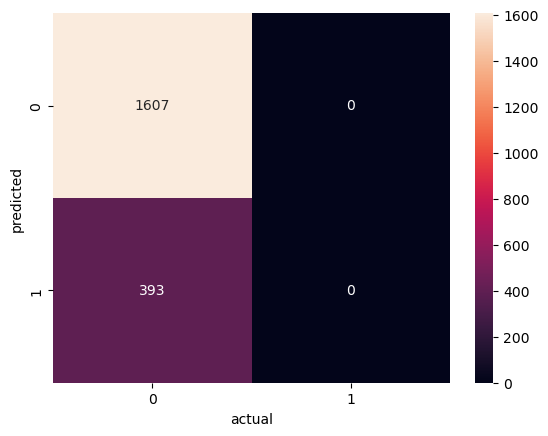

In [39]:
# ploting using Heatmap
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

# Building our model

In [40]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(9,),activation='tanh'),
    
    keras.layers.Dense(250,activation='tanh'),
    
    keras.layers.Dense(1,activation='sigmoid')
    
])



Now to compile the model we will use binary_crossentropy as our loss function because our task is to predict a binary value , and we are going to set our optimize to adam

In [41]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
250/250 [==============================] - 2s 3ms/step - loss: 0.4644 - accuracy: 0.8025
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.8075
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.8060
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.8056
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4431 - accuracy: 0.8069


In [42]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.8105


[0.42712002992630005, 0.8105000257492065]

In [43]:
y_predicted=model.predict(x_test)
y_predicted[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.13785729],
       [0.05213525],
       [0.26075962],
       [0.24336636],
       [0.07161556],
       [0.02962996],
       [0.3024399 ],
       [0.1187513 ],
       [0.31238678],
       [0.15877248]], dtype=float32)

In [44]:
y_pred=[]
for ele in y_predicted:
    if ele>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
y_pred[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1586,   21],
       [ 358,   35]])>

Text(50.722222222222214, 0.5, 'predicted')

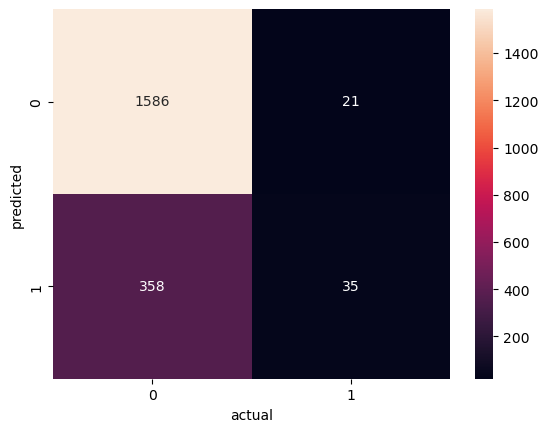

In [47]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

In [50]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1607
           1       0.62      0.09      0.16       393

    accuracy                           0.81      2000
   macro avg       0.72      0.54      0.52      2000
weighted avg       0.78      0.81      0.75      2000

